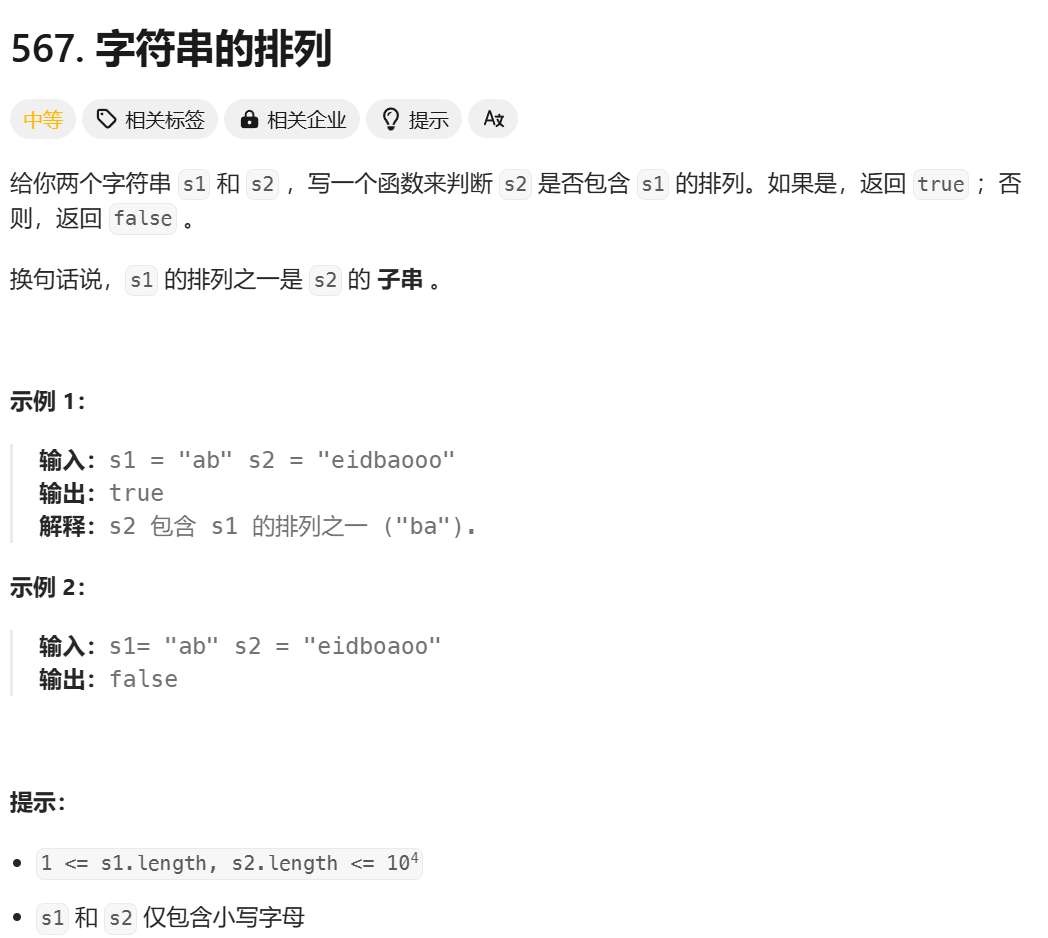

In [ ]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        s_array1 = sorted(s1)
        s_array2 = list(s2)

        for right in range(len(s_array1), len(s_array2) + 1):
            if s_array1 == sorted(s_array2[right - len(s_array1): right]):
                return True
        return False

In [12]:
from math import inf
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        # c语言考试原题哭了
        # 每次移动s1长度的窗口然后在子程序中排列好判断是不是相等
        s1 = sorted(s1) # 返回的是一个字符列表 因为在python 中字符串一旦创建就是不可变的了 所以sorted函数也是创建了一个列表的副本来进行排序操作
        size = len(s2)
        k = len(s1)
        temp = []
        bijiao = []
        left, right = 0, 0 
        while right < size:
            while right - left <= k - 1:
                temp.append(s2[right])
                right += 1
            bijiao = sorted(temp)
            if bijiao == s1:
                return True
            temp = temp[1:]
            left += 1
        return False

a = Solution()
a.checkInclusion('ab',  "eidbaooo")

True

## 还能用更加好的方法比如字典
- 如果将每次排序改成每次使用字典中的数目是不是相等的就好了
- 毕竟只要对应的元素数目相等那么就能返回True了
  

In [ ]:
from collections import Counter

class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        state1 = Counter([l for l in s1])
        def check(state1, state2):
            for key in state1:
                if state2[key] != state1[key]:
                    return False
            return True

        k = len(s1)
        if len(s2) < k: return False
        state2 = Counter()
        for i in range(k):
            state2[s2[i]] += 1
        if check(state1, state2): return True
        for i in range(k, len(s2)):
            state2[s2[i]] += 1
            state2[s2[i - k]] -= 1
            if check(state1, state2): return True
        return False